In [2]:
!pip install cellpose
!pip install opencv-python-headless
!pip install scikit-image
!pip install matplotlib

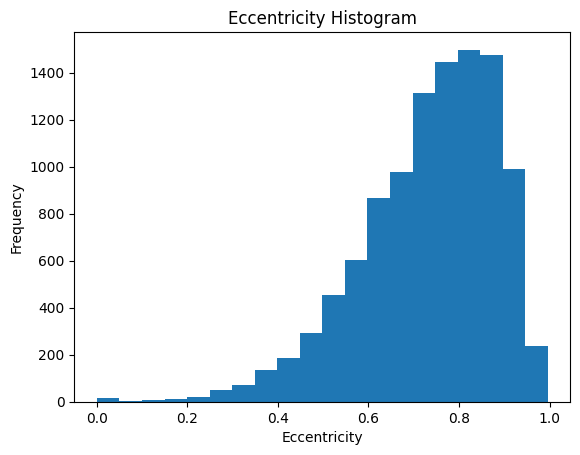

<Figure size 640x480 with 0 Axes>

In [27]:
from cellpose import models
from skimage import io, measure
import matplotlib.pyplot as plt


# Load the model
model = models.Cellpose(gpu=False, model_type='nuclei')

# Read all images from the TIFF file
images_path = '/Users/changboyen/Downloads/2024_AssocRDEng_TakeHome/Exercise3/Assoc_RDEng_test.tif'  
images = io.imread(images_path)

# Ensure images is a list of 2D arrays
if images.ndim == 3:
    # If the image is 3D (multiple channels or Z-stacks), select the first channel or Z-slice
    images = [img[0] if img.ndim == 3 else img for img in images]


# Process the images with Cellpose
masks, flows, styles, diams = model.eval(images, diameter=None, flow_threshold=None, channels=[0,0])

# Calculate eccentricities for all images
eccentricities = []
for mask in masks:
    props = measure.regionprops(mask)
    eccentricities.extend([prop.eccentricity for prop in props])

# Plot the histogram of eccentricities
plt.hist(eccentricities, bins=20)
plt.title('Eccentricity Histogram')
plt.xlabel('Eccentricity')
plt.ylabel('Frequency')

# Save the histogram to a file
save_path = '/Users/changboyen/Downloads/2024_AssocRDEng_TakeHome/Exercise3'  
histogram_filename = f'{save_path}/eccentricity_histogram.png'

plt.savefig(histogram_filename)  

plt.show()
